In [51]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import os
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [52]:
current_dir = os.getcwd() # Obtener la ruta del directorio actual del notebook
ROOT_PATH = os.path.dirname(current_dir) # Obtener la ruta del directorio superior
sys.path.insert(1, ROOT_PATH) # Insertar la ruta en sys.path

import root # Importar el módulo root

df_path = root.DIR_DATA_STAGE + 'df_imputado.csv'

In [53]:
df = pd.read_csv(df_path)

In [54]:
df.isnull().sum()

PLAZO                                       0
CAPITAL                                     0
INT CORRIENTE                               0
DÍAS MORA                                   0
INGRESOS MENSUALES                          0
GASTOS MENSUALES                            0
NUM.CREDITOS SOLICITADOS                    0
USUARIO RECURRENTE                          0
latitud                                     0
longitud                                    0
meses_transcurridos                         0
Cuotas en mora                              0
ESTRATO                                     0
mes_de_pago                                 0
TIPO EMPLEO_empleado                        0
TIPO EMPLEO_independiente                   0
TIPO EMPLEO_pensionado                      0
TIPO EMPLEO_prestador de servicios          0
TIPO DE VIVIENDA_familiar                   0
TIPO DE VIVIENDA_propia                     0
AÑOS EN LA VIVIENDA_mas de 5 anos           0
AÑOS EN LA VIVIENDA_menos de un an

In [55]:
df.columns

Index(['PLAZO', 'CAPITAL', 'INT CORRIENTE', 'DÍAS MORA', 'INGRESOS MENSUALES',
       'GASTOS MENSUALES', 'NUM.CREDITOS SOLICITADOS', 'USUARIO RECURRENTE',
       'latitud', 'longitud', 'meses_transcurridos', 'Cuotas en mora',
       'ESTRATO', 'mes_de_pago', 'TIPO EMPLEO_empleado',
       'TIPO EMPLEO_independiente', 'TIPO EMPLEO_pensionado',
       'TIPO EMPLEO_prestador de servicios', 'TIPO DE VIVIENDA_familiar',
       'TIPO DE VIVIENDA_propia', 'AÑOS EN LA VIVIENDA_mas de 5 anos',
       'AÑOS EN LA VIVIENDA_menos de un ano',
       'TIPO DE CONTRATO_prestacion de servicios',
       'TIPO DE CONTRATO_termino fijo', 'PERIODO DE PAGO_quincenal',
       'ESTADO CIVIL_comprometido/a', 'ESTADO CIVIL_divorciado/a',
       'ESTADO CIVIL_soltero/a', 'ESTADO CIVIL_union libre',
       'ESTADO CIVIL_viudo/a', 'NIVEL EDUCATIVO_postgrado',
       'NIVEL EDUCATIVO_primaria', 'NIVEL EDUCATIVO_profesional',
       'NIVEL EDUCATIVO_secundaria', 'NIVEL EDUCATIVO_tecnico',
       'NIVEL EDUCATIVO_t

In [56]:
binary_columns = df.columns[(df.nunique() == 2)]


In [57]:
binary_columns = binary_columns.tolist() + ['ESTRATO', 'mes_de_pago']
binary_columns

['USUARIO RECURRENTE',
 'Cuotas en mora',
 'TIPO EMPLEO_empleado',
 'TIPO EMPLEO_independiente',
 'TIPO EMPLEO_pensionado',
 'TIPO EMPLEO_prestador de servicios',
 'TIPO DE VIVIENDA_familiar',
 'TIPO DE VIVIENDA_propia',
 'AÑOS EN LA VIVIENDA_mas de 5 anos',
 'AÑOS EN LA VIVIENDA_menos de un ano',
 'TIPO DE CONTRATO_prestacion de servicios',
 'TIPO DE CONTRATO_termino fijo',
 'PERIODO DE PAGO_quincenal',
 'ESTADO CIVIL_comprometido/a',
 'ESTADO CIVIL_divorciado/a',
 'ESTADO CIVIL_soltero/a',
 'ESTADO CIVIL_union libre',
 'ESTADO CIVIL_viudo/a',
 'NIVEL EDUCATIVO_postgrado',
 'NIVEL EDUCATIVO_primaria',
 'NIVEL EDUCATIVO_profesional',
 'NIVEL EDUCATIVO_secundaria',
 'NIVEL EDUCATIVO_tecnico',
 'NIVEL EDUCATIVO_tecnologo',
 'TIPO DE VEHICULO_moto',
 'TIPO DE VEHICULO_ninguno',
 'ESTRATO',
 'mes_de_pago']

In [58]:
df.drop(binary_columns, axis=1).columns

Index(['PLAZO', 'CAPITAL', 'INT CORRIENTE', 'DÍAS MORA', 'INGRESOS MENSUALES',
       'GASTOS MENSUALES', 'NUM.CREDITOS SOLICITADOS', 'latitud', 'longitud',
       'meses_transcurridos'],
      dtype='object')

In [59]:
df.dtypes

PLAZO                                       float64
CAPITAL                                     float64
INT CORRIENTE                               float64
DÍAS MORA                                   float64
INGRESOS MENSUALES                          float64
GASTOS MENSUALES                            float64
NUM.CREDITOS SOLICITADOS                    float64
USUARIO RECURRENTE                          float64
latitud                                     float64
longitud                                    float64
meses_transcurridos                         float64
Cuotas en mora                                int64
ESTRATO                                     float64
mes_de_pago                                   int64
TIPO EMPLEO_empleado                        float64
TIPO EMPLEO_independiente                   float64
TIPO EMPLEO_pensionado                      float64
TIPO EMPLEO_prestador de servicios          float64
TIPO DE VIVIENDA_familiar                   float64
TIPO DE VIVI

### Correlacion categoricas

In [60]:
df_cat = df[binary_columns]

In [61]:
X = df_cat.drop('Cuotas en mora', axis=1)
y = df_cat['Cuotas en mora']

In [62]:
X.shape , y.shape

((4078, 27), (4078,))

In [63]:
X.isnull().sum()

USUARIO RECURRENTE                          0
TIPO EMPLEO_empleado                        0
TIPO EMPLEO_independiente                   0
TIPO EMPLEO_pensionado                      0
TIPO EMPLEO_prestador de servicios          0
TIPO DE VIVIENDA_familiar                   0
TIPO DE VIVIENDA_propia                     0
AÑOS EN LA VIVIENDA_mas de 5 anos           0
AÑOS EN LA VIVIENDA_menos de un ano         0
TIPO DE CONTRATO_prestacion de servicios    0
TIPO DE CONTRATO_termino fijo               0
PERIODO DE PAGO_quincenal                   0
ESTADO CIVIL_comprometido/a                 0
ESTADO CIVIL_divorciado/a                   0
ESTADO CIVIL_soltero/a                      0
ESTADO CIVIL_union libre                    0
ESTADO CIVIL_viudo/a                        0
NIVEL EDUCATIVO_postgrado                   0
NIVEL EDUCATIVO_primaria                    0
NIVEL EDUCATIVO_profesional                 0
NIVEL EDUCATIVO_secundaria                  0
NIVEL EDUCATIVO_tecnico           

In [64]:
chi_scores = chi2(X, y)

<Axes: >

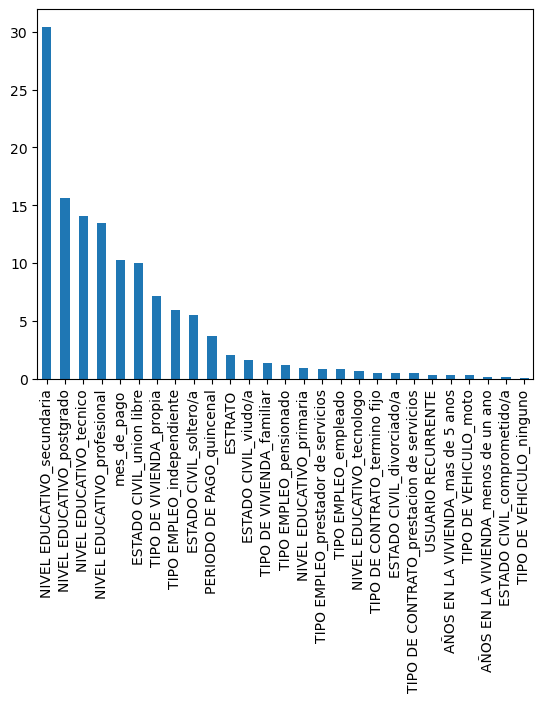

In [65]:
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

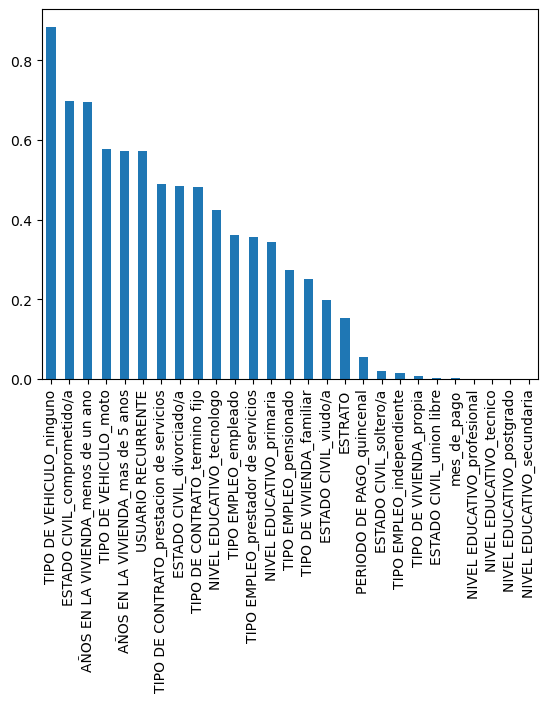

In [66]:
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [67]:
p_values = pd.DataFrame(p_values, columns=['p_value'])

In [68]:
indpendientes = p_values[p_values['p_value'] > 0.05]
indpendientes.head(20)

,p_value
TIPO DE VEHICULO_ninguno,0.884983
ESTADO CIVIL_comprometido/a,0.698290
AÑOS EN LA VIVIENDA_menos de un ano,0.696033
TIPO DE VEHICULO_moto,0.578161
AÑOS EN LA VIVIENDA_mas de 5 anos,0.572675
USUARIO RECURRENTE,0.571341
TIPO DE CONTRATO_prestacion de servicios,0.489492
ESTADO CIVIL_divorciado/a,0.483382
TIPO DE CONTRATO_termino fijo,0.480815
NIVEL EDUCATIVO_tecnologo,0.422916


In [69]:
cat_col_to_drop = indpendientes.index.tolist()

In [70]:
cat_col_to_drop

['TIPO DE VEHICULO_ninguno',
 'ESTADO CIVIL_comprometido/a',
 'AÑOS EN LA VIVIENDA_menos de un ano',
 'TIPO DE VEHICULO_moto',
 'AÑOS EN LA VIVIENDA_mas de 5 anos',
 'USUARIO RECURRENTE',
 'TIPO DE CONTRATO_prestacion de servicios',
 'ESTADO CIVIL_divorciado/a',
 'TIPO DE CONTRATO_termino fijo',
 'NIVEL EDUCATIVO_tecnologo',
 'TIPO EMPLEO_empleado',
 'TIPO EMPLEO_prestador de servicios',
 'NIVEL EDUCATIVO_primaria',
 'TIPO EMPLEO_pensionado',
 'TIPO DE VIVIENDA_familiar',
 'ESTADO CIVIL_viudo/a',
 'ESTRATO',
 'PERIODO DE PAGO_quincenal']

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

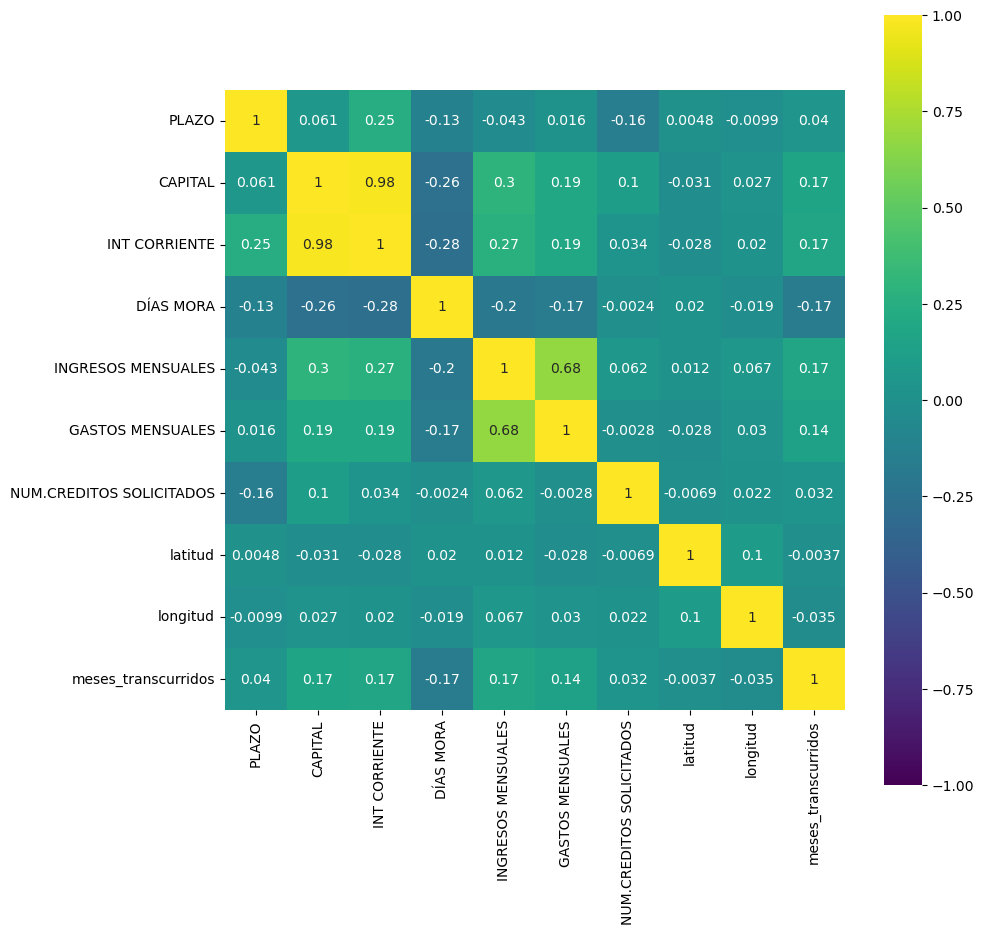

In [72]:
X_num = df.drop(binary_columns, axis=1)

corr_matrix = X_num.corr()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True,vmin=-1, vmax=1)
plt.show()


In [73]:
num_cols_to_drop = ['INT CORRIENTE']

In [74]:
df_final = df.drop(num_cols_to_drop, axis=1)
df_final = df_final.drop(cat_col_to_drop, axis=1)

In [75]:
df_final.columns

Index(['PLAZO', 'CAPITAL', 'DÍAS MORA', 'INGRESOS MENSUALES',
       'GASTOS MENSUALES', 'NUM.CREDITOS SOLICITADOS', 'latitud', 'longitud',
       'meses_transcurridos', 'Cuotas en mora', 'mes_de_pago',
       'TIPO EMPLEO_independiente', 'TIPO DE VIVIENDA_propia',
       'ESTADO CIVIL_soltero/a', 'ESTADO CIVIL_union libre',
       'NIVEL EDUCATIVO_postgrado', 'NIVEL EDUCATIVO_profesional',
       'NIVEL EDUCATIVO_secundaria', 'NIVEL EDUCATIVO_tecnico'],
      dtype='object')

In [76]:
len(df_final.columns)

19

## train test split

In [77]:
X = df_final.drop('Cuotas en mora', axis=1)
y = df_final['Cuotas en mora']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [79]:
y_train.value_counts()

Cuotas en mora
1    2062
0    1200
Name: count, dtype: int64

## Balanceo

### info usuarios

In [80]:
df_train = pd.concat([X_train, y_train], axis=1)

count_class_1, count_class_0 = df_train['Cuotas en mora'].value_counts()

df_class_0 = df_train[df_train['Cuotas en mora'] == 0]
df_class_1 = df_train[df_train['Cuotas en mora'] == 1]

df_class_0_over = df_class_0.sample(count_class_1, replace=True)

In [81]:
df_train_over = pd.concat([df_class_1, df_class_0_over], axis=0)

In [82]:
df_train_over['Cuotas en mora'].value_counts()

Cuotas en mora
1    2062
0    2062
Name: count, dtype: int64

In [83]:
df_test = pd.concat([X_test, y_test], axis=1)

### Guardar el df Final

In [84]:
file_path = root.DIR_DATA_STAGE + 'train_infousers.csv'
df_train_over.to_csv(file_path, index=False)

In [85]:
file_path = root.DIR_DATA_STAGE + 'test_infousers.csv'
df_test.to_csv(file_path, index=False)

## infocreditos

In [86]:
path_infocreditos = root.DIR_DATA_RAW + 'db_raw_reducida.csv'

In [87]:
df_infocreditos = pd.read_csv(path_infocreditos)

In [88]:
df_infocreditos['PRÓXIMA FECHA PAGO'] = pd.to_datetime(df_infocreditos['PRÓXIMA FECHA PAGO'], errors='coerce', format='%Y-%m-%d')
df_infocreditos['mes'] = df_infocreditos['PRÓXIMA FECHA PAGO'].dt.month
df_infocreditos[['PRÓXIMA FECHA PAGO','mes']].head()


,PRÓXIMA FECHA PAGO,mes
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN


In [89]:
df_infocreditos.drop(columns=['PRÓXIMA FECHA PAGO'], inplace=True)

In [90]:
df_infocreditos['mora'] =  (df_infocreditos['DÍAS MORA'] > 3).astype(int)

In [91]:
X = df_infocreditos.drop('mora', axis=1)
y = df_infocreditos['mora']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [93]:
y_train.value_counts()

mora
0    58893
1    35230
Name: count, dtype: int64

In [94]:
df_train = pd.concat([X_train, y_train], axis=1)

count_class_0, count_class_1 = df_train['mora'].value_counts()

df_class_0 = df_train[df_train['mora'] == 0]
df_class_1 = df_train[df_train['mora'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [95]:
count_class_0

58893

In [96]:
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [97]:
df_train_over.mora.value_counts()

mora
0    58893
1    58893
Name: count, dtype: int64

### Guardar el df Final

In [98]:
file_path = root.DIR_DATA_STAGE + 'train_creditinfo.csv'
df_train_over.to_csv(file_path, index=False)

In [99]:
file_path = root.DIR_DATA_STAGE + 'test_creditinfo.csv'
df_test.to_csv(file_path, index=False)